### PREPARE

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from lazypredict.Supervised import LazyClassifier

LOAD DATA

In [2]:
data = pd.read_csv("comments_final2.csv", encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36932 entries, 0 to 36931
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Column1         36932 non-null  int64 
 1   processed_text  36932 non-null  object
 2   class           36932 non-null  object
 3   word_count      36932 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [21]:
data['class'].value_counts()

positive    27643
negative     5279
neutral      4010
Name: class, dtype: int64

([<matplotlib.patches.Wedge at 0x117e7e48af0>,
 [Text(0.09889122771092497, -1.1959182769244001, 'Positive'),
  Text(0.28130501860981283, 1.063422534322521, 'Negative'),
  Text(-0.5575638640277112, 0.9482207219474209, 'Neutral')],
 [Text(0.05768654949803956, -0.6976189948725666, '74.8%'),
  Text(0.1534391010598979, 0.5800486550850114, '14.3%'),
  Text(-0.30412574401511516, 0.5172113028804113, '10.9%')])

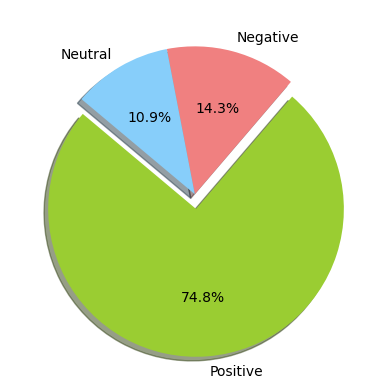

In [23]:
#create pie chart to compare numbers of comments in each class
import matplotlib.pyplot as plt
labels = ['Positive', 'Negative', 'Neutral']
sizes = [data['class'].value_counts()[0], data['class'].value_counts()[1], data['class'].value_counts()[2]]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

In [5]:
df_sub= data.sample(frac=0.02)

In [6]:
source = df_sub['processed_text']
target = df_sub['class']

### LAZY PREDICT (WITH 3 CLASSES)

In [7]:
target = target.replace("negative", 0)
target = target.replace("neutral", 1)
target = target.replace("positive", 2)

### tf_idf

In [8]:
# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)

In [9]:
# Fit the TfidfVectorizer object to the data
x = tfidf_vectorizer.fit(df_sub['processed_text'].values.astype('U'))

In [10]:
# Transform the data
X = tfidf_vectorizer.transform(df_sub['processed_text'].values.astype('U'))

In [11]:
### BUG: 
# This is probably because you are using an older scikit-learn version than the one this code was written for.
# get_feature_names_out is a method of the class sklearn.feature_extraction.text.TfidfVectorizer since scikit-learn 1.0. Previously, there was a similar method called get_feature_names.
# So you should update your scikit-learn package, or use the old method (not recommended).
# Create a new dataframe with the transformed data
df_new = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [12]:
X = X.toarray()

In [13]:
y = np.array(target)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [15]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:03<00:00,  8.78it/s]


In [16]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.70,0.57,None,0.74,0.05
LinearSVC,0.75,0.54,None,0.75,0.28
LogisticRegression,0.74,0.52,None,0.75,0.05
DecisionTreeClassifier,0.71,0.50,None,0.70,0.04
Perceptron,0.74,0.48,None,0.75,0.03
LinearDiscriminantAnalysis,0.74,0.48,None,0.74,0.05
BaggingClassifier,0.74,0.48,None,0.71,0.17
KNeighborsClassifier,0.69,0.47,None,0.68,0.07
ExtraTreesClassifier,0.75,0.46,None,0.72,0.24


### LAZY PREDICT (WITH 2 CLASSES)

In [ ]:
df_sub2 = df_sub

: 

In [ ]:
df_sub2['class'] = df_sub2['class'].apply(lambda x: 0 if x == 'negative' or x== 'neutral' else 1 )

: 

In [ ]:
df_sub2['class'].value_counts()

: 

In [ ]:
target2 = df_sub2['class']

: 

In [ ]:
# Fit the TfidfVectorizer object to the data
x_2 = tfidf_vectorizer.fit(df_sub2['processed_text'].values.astype('U'))

: 

In [ ]:
# Transform the data
X2 = tfidf_vectorizer.transform(df_sub2['processed_text'].values.astype('U'))

: 

In [ ]:
X2 = X2.toarray()

: 

In [ ]:
y2 = np.array(target2)

: 

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20) 

: 

In [ ]:
models2, predictions2 = clf.fit(X_train2, X_test2, y_train2, y_test2)

: 

In [ ]:
models2

: 

### RESAMPLING

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

: 

In [ ]:
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X,y)

: 

In [ ]:
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size=0.20) 

: 

### SMOTE for 3 classes

In [ ]:
models_smt, predictions_smt = clf.fit(X_train_smt, X_test_smt, y_train_smt, y_test_smt)

: 

In [ ]:
models_smt

: 

In [ ]:
X_smt2, y_smt2 = smt.fit_resample(X2,y2)

: 

In [ ]:
X_train_smt2, X_test_smt2, y_train_smt2, y_test_smt2 = train_test_split(X_smt2, y_smt2, 
                                                    test_size=0.20) 

: 

In [ ]:
models_smt2, predictions_smt2 = clf.fit(X_train_smt2, X_test_smt2, y_train_smt2, y_test_smt2)

: 

### SMOTE for 2 CLasses

In [ ]:
models_smt2

: 

## Kết luận

#### Model preslection

##### đối với 3 class
...

##### đối với 2 class
...